# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col]) #categorical data -> numerical data           
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
#{:}dictionary 的形式 -> 轉換

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [20]:
# 觀察相關係數
#print(app_train.corr()) # tabular structured data

print(app_train.corr()['TARGET'])

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [23]:

sequence = app_train.corr()['TARGET'].sort_values(ascending = False)


In [38]:
maxi = np.asarray(sequence.index[1:16])
maxi

array(['DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION',
       'OWN_CAR_AGE', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_WORK_PHONE'], dtype=object)

In [42]:
mini = np.asarray(sequence.index.values[-1:-16:-1])
mini

array(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'DAYS_EMPLOYED_ANOM', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI',
       'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'FLOORSMIN_AVG',
       'FLOORSMIN_MEDI', 'LIVINGAREA_AVG'], dtype=object)

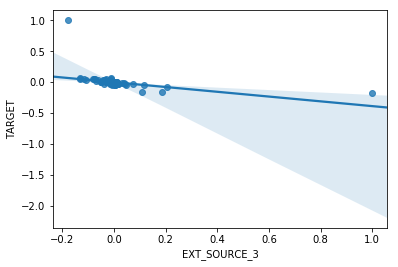

In [37]:
import seaborn as sns

sns.regplot(x='EXT_SOURCE_3' , y='TARGET',data=app_train.corr())

In [45]:
app_train.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
SK_ID_CURR,1.000000,-0.002108,0.001654,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,...,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659,0.001368
TARGET,-0.002108,1.000000,-0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,...,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,-0.045987
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241544,-0.185850,...,-0.005190,-0.007308,0.055821,0.000453,-0.005118,-0.015296,-0.014369,-0.021962,-0.052494,-0.054967
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,...,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345,-0.154778
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045537,...,-0.019364,-0.025130,-0.000173,-0.004120,-0.009267,0.007474,-0.004480,0.015451,0.067451,0.070107
CNT_CHILDREN,-0.001129,0.019187,0.029998,0.102023,-0.002366,1.000000,0.012882,0.002145,0.021374,-0.001827,...,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550,-0.240722
AMT_INCOME_TOTAL,-0.001820,-0.003982,-0.003531,0.083383,0.002934,0.012882,1.000000,0.156870,0.191657,0.159610,...,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690,-0.064038
AMT_CREDIT,-0.000343,-0.030369,-0.221648,0.116225,-0.039270,0.002145,0.156870,1.000000,0.770138,0.986968,...,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448,-0.065594
AMT_ANNUITY,-0.000433,-0.012817,-0.241544,0.141588,-0.005225,0.021374,0.191657,0.770138,1.000000,0.775109,...,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320,-0.103608
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.185850,0.120310,-0.045537,-0.001827,0.159610,0.986968,0.775109,1.000000,...,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998,-0.063569


array([-3.00000000e-01, -2.00000000e-01, -1.00000000e-01,  5.55111512e-17,
        1.00000000e-01,  2.00000000e-01,  3.00000000e-01,  4.00000000e-01,
        5.00000000e-01])